In [ ]:
!pip install tensorflow
!pip install datasets
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

print(tf.__version__)

2.15.0


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
def preprocess(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label


In [ ]:
def augment(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1) # Adjust brightness by up to 10%
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1) # Adjust contrast between 90% and 110%
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


(ds_train, ds_validation), ds_info = tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True,
)

train_ds = ds_train.map(augment).batch(32).prefetch(tf.data.AUTOTUNE)

val_ds = ds_validation.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteDA8KWC/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
img_width = 96
img_height= 96

**Building the CNN Model**

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape =(img_width, img_height,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(256, (3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,
                    epochs= 15,
                    validation_data = val_ds,)

Epoch 1/15
689/689 [==============================] - 62s 70ms/step - loss: 0.2477 - accuracy: 0.8988 - val_loss: 0.1641 - val_accuracy: 0.9557
Epoch 2/15
689/689 [==============================] - 23s 33ms/step - loss: 0.1501 - accuracy: 0.9543 - val_loss: 0.1425 - val_accuracy: 0.9548
Epoch 3/15
689/689 [==============================] - 22s 32ms/step - loss: 0.1404 - accuracy: 0.9565 - val_loss: 0.1392 - val_accuracy: 0.9565
Epoch 4/15
689/689 [==============================] - 23s 33ms/step - loss: 0.1367 - accuracy: 0.9587 - val_loss: 0.1462 - val_accuracy: 0.9541
Epoch 5/15
689/689 [==============================] - 25s 36ms/step - loss: 0.1355 - accuracy: 0.9572 - val_loss: 0.1431 - val_accuracy: 0.9546
Epoch 6/15
689/689 [==============================] - 25s 36ms/step - loss: 0.1299 - accuracy: 0.9592 - val_loss: 0.1268 - val_accuracy: 0.9603
Epoch 7/15
689/689 [==============================] - 23s 33ms/step - loss: 0.1241 - accuracy: 0.9597 - val_loss: 0.1211 - val_accuracy:

In [ ]:
history.history

{'loss': [0.2476634681224823,
  0.15012818574905396,
  0.14043696224689484,
  0.1366959661245346,
  0.13554731011390686,
  0.12985165417194366,
  0.12412577122449875,
  0.11982329934835434,
  0.11481282860040665,
  0.1137470081448555,
  0.1085149273276329,
  0.10842245817184448,
  0.10410164296627045,
  0.102622851729393,
  0.10134848207235336],
 'accuracy': [0.8988478779792786,
  0.9542773962020874,
  0.9565454125404358,
  0.9587226510047913,
  0.9572257995605469,
  0.959221601486206,
  0.9597206115722656,
  0.9607185125350952,
  0.9613988995552063,
  0.9615803360939026,
  0.9628050327301025,
  0.963077187538147,
  0.9655719995498657,
  0.9648008942604065,
  0.9653452038764954],
 'val_loss': [0.1641017496585846,
  0.14248749613761902,
  0.1392098218202591,
  0.1461513787508011,
  0.14308898150920868,
  0.12679384648799896,
  0.12106596678495407,
  0.12252529710531235,
  0.11583925783634186,
  0.12174691259860992,
  0.12243925034999847,
  0.11512298882007599,
  0.11150512099266052,
  0

In [ ]:
model.save('model_2.keras')

In [ ]:
def plot_learningCurve(history, epoch):
  epoch_range= range(1, epoch+1)
  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

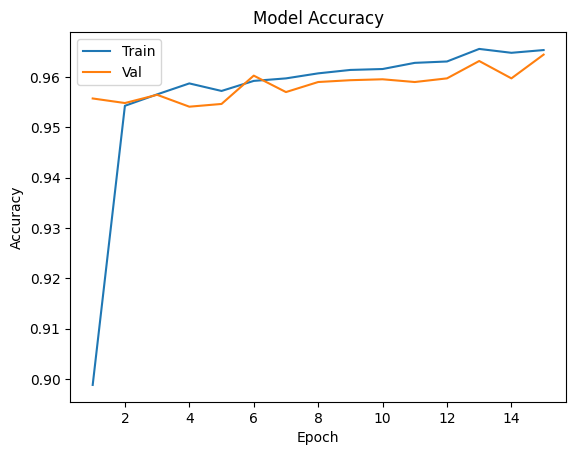

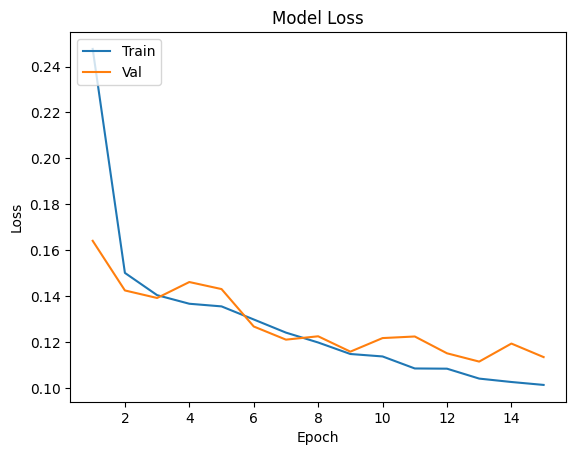

In [ ]:
plot_learningCurve(history, 15)

173/173 [==============================] - 1s 4ms/step


<Figure size 1000x1000 with 0 Axes>

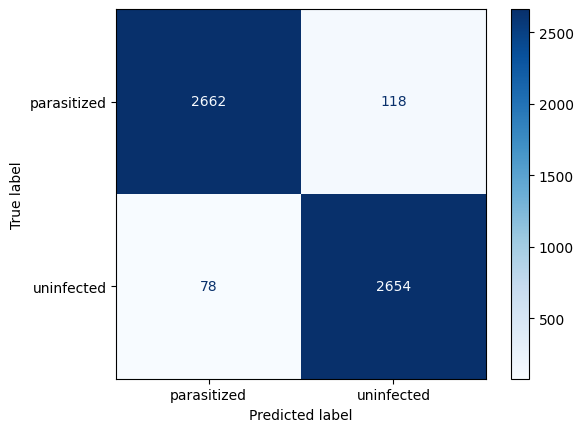

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Making predictions with the model
val_images, val_labels = next(iter(val_ds.unbatch().batch(len(ds_validation))))
val_predictions = model.predict(val_images)
val_pred_classes = (val_predictions > 0.5).astype(int)  # Binary classification threshold

# Computing the confusion matrix
cm = confusion_matrix(val_labels, val_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds_info.features['label'].names)

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues)
plt.show()